In [2]:
import numpy as np
import pandas as pd

In [45]:
df = pd.DataFrame({'key1': list("aabba"), 'key2': list("FGRRG"),
                  'data1': range(5), 'data2': np.random.randn(5)})

people = pd.DataFrame(np.random.randn(5, 5), columns=list(
    "abcde"), index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

people2 = people
people2.columns = [people2.columns, list("AABBA")]

# GroupBy (Chap 10.1) 
> 各种分组操作；
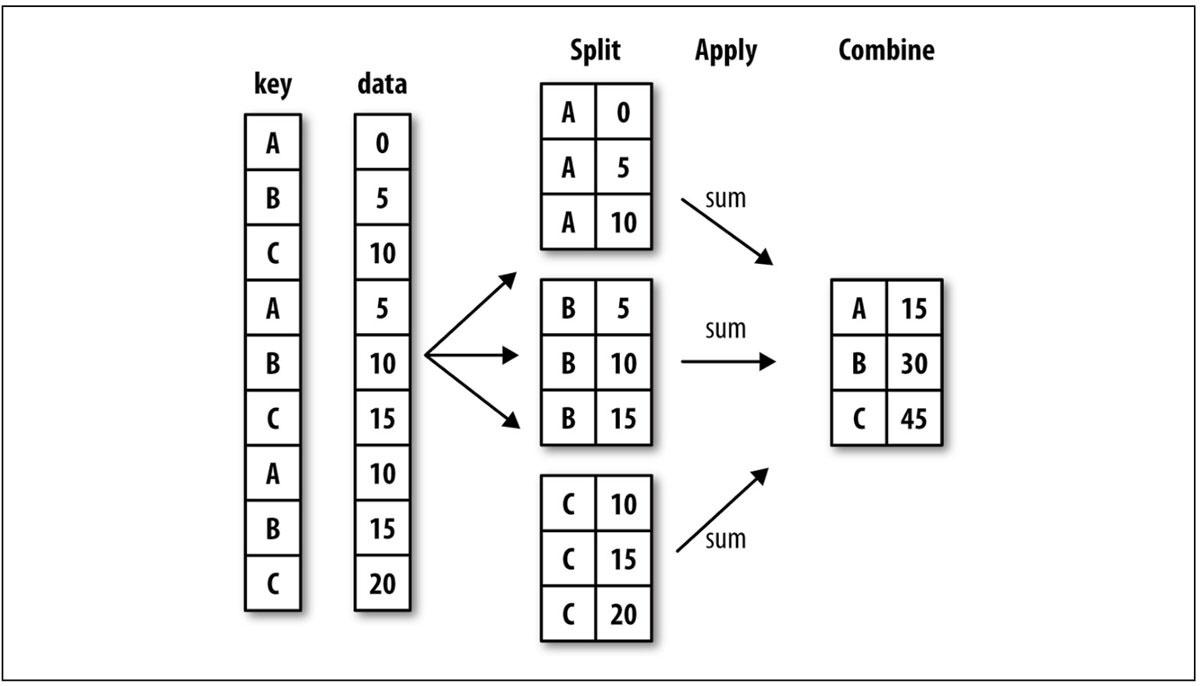

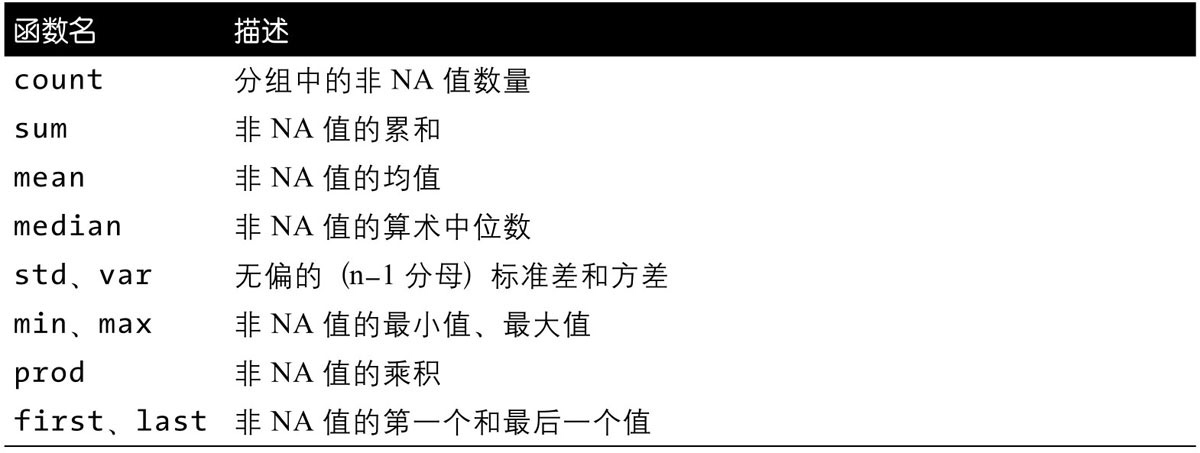

In [11]:
df = pd.DataFrame({'key1': list("aabba"), 'key2': list("FGRRG"),
                  'data1': range(5), 'data2': np.random.randn(5)}) 
df

,key1,key2,data1,data2
0,a,F,0,0.002118
1,a,G,1,0.405453
2,b,R,2,0.289092
3,b,R,3,1.321158
4,a,G,4,-1.546906


In [9]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    1.666667
b    2.500000
Name: data1, dtype: float64

In [24]:
means = df['data1'].groupby([df['key1'], df['key2']])
means.mean()
means.mean().unstack()

key2,F,G,R
key1,,,
a,0.0,2.5,NaN
b,NaN,NaN,2.5


## 遍历各元祖（Chap 10.1.1）
> groupby对象支持迭代，会生成一个包含组名和数据块的二维元祖序列；（暂时没搞懂和上述部分对象的差别）

In [14]:
df = pd.DataFrame({'key1': list("aabba"), 'key2': list("FGRRG"),
                  'data1': range(5), 'data2': np.random.randn(5)}) 
df

,key1,key2,data1,data2
0,a,F,0,-0.553700
1,a,G,1,0.573107
2,b,R,2,0.460426
3,b,R,3,0.680774
4,a,G,4,1.569878


In [27]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2  data1     data2
0    a    F      0 -0.600830
1    a    G      1 -0.490688
4    a    G      4  2.052609
b
  key1 key2  data1     data2
2    b    R      2 -0.647909
3    b    R      3 -0.835410


In [29]:
for (name1, name2), group in df.groupby(['key1', 'key2']):
    print(name1, name2)
    print(group, '\n')

a F
  key1 key2  data1    data2
0    a    F      0 -0.60083 

a G
  key1 key2  data1     data2
1    a    G      1 -0.490688
4    a    G      4  2.052609 

b R
  key1 key2  data1     data2
2    b    R      2 -0.647909
3    b    R      3 -0.835410 



In [39]:
pieces = df.groupby('key1')
piece1 = list(pieces)
piece1[0][1]
piece2 = dict(piece1)
piece2['a']

,key1,key2,data1,data2
0,a,F,0,2.298112
1,a,G,1,-0.878329
4,a,G,4,0.211350


In [54]:
grouped = df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype,'\n', group, '\n')

int64 
    data1
0      0
1      1
2      2
3      3
4      4 

float64 
       data2
0  2.298112
1 -0.878329
2  1.184494
3 -0.104464
4  0.211350 

object 
   key1 key2
0    a    F
1    a    G
2    b    R
3    b    R
4    a    G 



## 选择一列或所有列的子集(Chap 10.1.2)
> 先groupby后索引 与 先索引后groupby互为语法糖

In [14]:
df = pd.DataFrame({'key1': list("aabba"), 'key2': list("FGRRG"),
                  'data1': range(5), 'data2': np.random.randn(5)}) 
df

,key1,key2,data1,data2
0,a,F,0,-0.553700
1,a,G,1,0.573107
2,b,R,2,0.460426
3,b,R,3,0.680774
4,a,G,4,1.569878


In [56]:
df.groupby('key1')['data1']
df['data1'].groupby(df['key1'])

key1
a    1.666667
b    2.500000
Name: data1, dtype: float64

## 使用字典和Series分组（Chap 10.1.3）
> 分组信息可能会以非数组形式存在，使用字典和Series功能相同

In [50]:
people = pd.DataFrame(np.random.randn(5, 5), columns=list(
    "abcde"), index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,-0.722020,-0.947175,-0.282797,-0.824324,-1.992657
Steve,1.383521,1.438115,-0.355420,1.391176,-0.349452
Wes,0.240054,-0.057057,-0.173676,-0.119693,1.315562
Jim,0.089291,0.454389,0.854294,0.245116,0.484166
Travis,0.036249,-0.546831,1.459886,-1.180301,0.378125


In [24]:
mapping = dict(a='red', b='blue', c='blue', d='blue', e='red')
mapping
by_column = people.groupby(mapping, axis=1)
by_column.sum()

{'a': 'red', 'b': 'blue', 'c': 'blue', 'd': 'blue', 'e': 'red'}

,blue,red
Joe,-1.056800,-1.557359
Steve,2.233791,2.428823
Wes,-0.312115,1.681591
Jim,-0.121828,0.199075
Travis,-1.521035,-0.915657


In [39]:
map_series = []
for x in mapping:
    map_series.append(mapping[x])
map_series = pd.Series(map_series, index=people.index)
map_series
by_column = people.groupby(map_series, axis=0)
by_column.count()

Joe        red
Steve     blue
Wes       blue
Jim       blue
Travis     red
dtype: object

,a,b,c,d,e
blue,3,3,3,3,3
red,2,2,2,2,2


## 使用函数分组
1. 使用函数分组；
2. 将函数、字典或Series混合(multi-index)

In [40]:
people.groupby(len).count()

,a,b,c,d,e
3,3,3,3,3,3
5,1,1,1,1,1
6,1,1,1,1,1


In [41]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).count()

a  b  c  d  e
3 one  2  2  2  2  2
  two  1  1  1  1  1
5 one  1  1  1  1  1
6 two  1  1  1  1  1

## 根据索引层级分组 （chap10.1.5）

In [53]:
people = pd.DataFrame(np.random.randn(5, 5), columns=list(
    "abcde"), index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people2 = people
people2.columns = [people2.columns, list("AABBA")]
people2.columns.names = ['lower', 'upper']
people2

lower,a,b,c,d,e
upper,A,A,B,B,A
Joe,-0.038520,1.926220,0.441177,0.075871,0.710816
Steve,-0.042475,-1.265025,-0.677097,1.701349,0.518029
Wes,-0.592656,1.482845,0.227322,-0.909180,0.217613
Jim,0.272681,-0.026829,-1.372775,1.109922,-0.459059
Travis,-0.542800,0.869408,0.063119,0.932713,-0.393510


In [54]:
people2.groupby(level='upper', axis=1).count()

upper,A,B
Joe,3,2
Steve,3,2
Wes,3,2
Jim,3,2
Travis,3,2


# 数组聚合：优化的Groupby（Chap 10.2）
> 可以使用自行定制的聚合，并再调用已经在分组对象上定义好的方法。
## 自定义聚合函数: aggregate或agg方法

In [68]:
df = pd.DataFrame({'key1': list("aabba"), 'key2': list("FGRRG"),
                  'data1': range(5), 'data2': np.random.randn(5)})
df
grouped = df.groupby('key1')
grouped.quantile(0.9)

,key1,key2,data1,data2
0,a,F,0,-0.906595
1,a,G,1,-0.551719
2,b,R,2,-0.654557
3,b,R,3,-0.498316
4,a,G,4,-0.672306


,data1,data2
key1,,
a,3.4,-0.575837
b,2.9,-0.513940


In [69]:
def peak(arr):
    return arr.max()-arr.min()
grouped.agg(peak)
grouped.describe()

,data1,data2
key1,,
a,4,0.354876
b,1,0.156240


data1                                                data2            \
     count      mean       std  min   25%  50%   75%  max count      mean   
key1                                                                        
a      3.0  1.666667  2.081666  0.0  0.50  1.0  2.50  4.0   3.0 -0.710207   
b      2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0   2.0 -0.576436   

                                                                  
           std       min       25%       50%       75%       max  
key1                                                              
a     0.180448 -0.906595 -0.789451 -0.672306 -0.612013 -0.551719  
b     0.110479 -0.654557 -0.615496 -0.576436 -0.537376 -0.498316

## 逐列及多函数应用
1. 列表；
2. 字典，对应列使用对应函数
3. as_index=False 返回不含索引的聚合数据

In [72]:
grouped2 = df.groupby(['key1', 'key2'])
for x, y in grouped2:
    print(x)
    print(y)

('a', 'F')
  key1 key2  data1     data2
0    a    F      0 -0.906595
('a', 'G')
  key1 key2  data1     data2
1    a    G      1 -0.551719
4    a    G      4 -0.672306
('b', 'R')
  key1 key2  data1     data2
2    b    R      2 -0.654557
3    b    R      3 -0.498316


In [75]:
grouped2.agg(['mean', 'std'])

data1               data2          
           mean       std      mean       std
key1 key2                                    
a    F      0.0       NaN -0.906595       NaN
     G      2.5  2.121320 -0.612013  0.085268
b    R      2.5  0.707107 -0.576436  0.110479

In [81]:
grouped.agg({'data1': peak, 'data2': 'mean'})

,data1,data2
key1,,
a,4,-0.710207
b,1,-0.576436


# Groupby split-apply 联合应用（Chap 10.3）
> 上述为Groupby的拆分应用，apply将对象拆分成多块，然后将每一块调用传递的函数，之后尝试将每一块拼接到一块。